In [17]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications import
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#ImageDataGeneration --Data Augmentation --helps to create new images
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import matplotlib.pyplot as plt


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train'
valid_path = '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Test'


In [21]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights = 'imagenet' , include_top = False)

In [22]:
#summary of our layers in the model

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [23]:
for layer in resnet.layers:
    layer.trainable = False


In [24]:
folders = glob('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/*')

In [25]:
folders

['/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/matiz blue',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/matiz black',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/rio red',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/matiz red',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/tiggo black',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/tiggo blue',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/rio blue',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/rio black',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/tiggo red']

In [26]:
len(folders)

9

In [27]:

x = Flatten()(resnet.output)

In [28]:
prediction = Dense(len(folders) , activation='softmax')(x)
model = Model(inputs=resnet.input , outputs = prediction)

In [29]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the training data generator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

#Set the test data generator
test_datagen = ImageDataGenerator(rescale = 1./255)


In [32]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2303 images belonging to 9 classes.


In [33]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 270 images belonging to 9 classes.


In [34]:
# fit the model
# Run the cell.
r=model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/50
72/72 [==============================] - 1714s 24s/step - loss: 6.2336 - accuracy: 0.1637 - val_loss: 3.6082 - val_accuracy: 0.1852
Epoch 2/50
72/72 [==============================] - 48s 666ms/step - loss: 2.4396 - accuracy: 0.2696 - val_loss: 2.4944 - val_accuracy: 0.2407
Epoch 3/50
72/72 [==============================] - 47s 646ms/step - loss: 2.1956 - accuracy: 0.3187 - val_loss: 2.4372 - val_accuracy: 0.3556
Epoch 4/50
72/72 [==============================] - 49s 677ms/step - loss: 2.1673 - accuracy: 0.3378 - val_loss: 2.1687 - val_accuracy: 0.3037
Epoch 5/50
72/72 [==============================] - 49s 677ms/step - loss: 2.2596 - accuracy: 0.3356 - val_loss: 2.2359 - val_accuracy: 0.3259
Epoch 6/50
72/72 [==============================] - 46s 639ms/step - loss: 2.0053 - accuracy: 0.3817 - val_loss: 1.7322 - val_accuracy: 0.4704
Epoch 7/50
72/72 [==============================] - 48s 666ms/step - loss: 1.9999 - accuracy: 0.4003 - val_loss: 2.6447 - val_accuracy: 0.2889

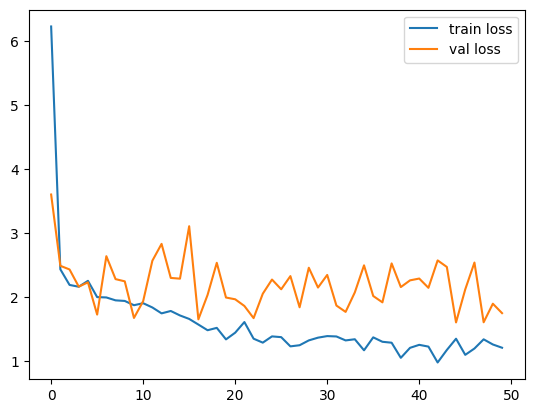

<Figure size 640x480 with 0 Axes>

In [35]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')





In [36]:
# save as a h5 file

from tensorflow.keras.models import load_model

model.save('mod-resnet50.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
y_pred = model.predict(test_set)

9/9 [==============================] - 4s 251ms/step


In [38]:
y_pred

array([[2.0538864e-03, 5.3421911e-05, 5.3295666e-01, ..., 5.1655754e-04,
        5.1468429e-05, 1.1810805e-02],
       [2.0069442e-07, 2.0240273e-11, 1.1866842e-08, ..., 1.6150544e-06,
        9.9902356e-01, 3.7088673e-06],
       [2.1194008e-01, 1.2662162e-01, 5.7934153e-01, ..., 2.0683215e-03,
        3.0589083e-04, 5.5266841e-04],
       ...,
       [1.9233434e-03, 8.4938018e-10, 3.1519323e-09, ..., 2.4740939e-01,
        5.6087130e-01, 1.6595492e-01],
       [2.9881337e-01, 8.3530834e-03, 8.1946253e-04, ..., 8.4777670e-03,
        6.5769069e-05, 1.3871616e-05],
       [8.1355544e-03, 4.3010369e-02, 1.4440893e-02, ..., 1.2799810e-01,
        3.5548517e-03, 7.7190013e-03]], dtype=float32)

In [39]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [40]:
y_pred

array([2, 7, 2, 5, 6, 5, 6, 5, 5, 5, 0, 7, 7, 4, 6, 8, 7, 8, 6, 3, 8, 3,
       5, 4, 4, 3, 4, 7, 6, 1, 3, 3, 5, 3, 4, 3, 4, 8, 7, 4, 6, 8, 2, 6,
       5, 0, 2, 6, 0, 8, 6, 6, 3, 0, 4, 4, 3, 4, 6, 6, 8, 4, 0, 5, 7, 4,
       6, 6, 4, 8, 8, 6, 5, 2, 7, 8, 4, 8, 6, 6, 4, 3, 3, 5, 3, 4, 8, 6,
       6, 6, 6, 7, 3, 3, 0, 3, 4, 1, 4, 6, 6, 5, 4, 4, 7, 5, 6, 0, 4, 6,
       1, 5, 1, 3, 4, 3, 8, 5, 4, 6, 8, 8, 8, 6, 8, 8, 6, 8, 3, 7, 4, 0,
       5, 7, 5, 2, 6, 1, 0, 3, 2, 5, 0, 4, 8, 5, 6, 1, 6, 5, 3, 5, 5, 5,
       4, 5, 4, 5, 5, 6, 5, 0, 6, 5, 5, 1, 8, 6, 5, 7, 5, 8, 6, 8, 6, 6,
       3, 5, 5, 5, 6, 5, 6, 6, 5, 3, 6, 5, 4, 1, 0, 8, 5, 5, 0, 4, 1, 6,
       4, 5, 5, 4, 4, 3, 5, 6, 5, 3, 4, 2, 4, 3, 0, 4, 5, 7, 1, 8, 8, 2,
       5, 5, 1, 5, 6, 6, 5, 5, 8, 2, 6, 4, 7, 8, 8, 4, 0, 5, 1, 7, 3, 2,
       5, 4, 4, 5, 6, 8, 7, 4, 3, 6, 8, 8, 6, 5, 7, 4, 3, 2, 7, 4, 0, 5,
       6, 0, 2, 7, 3, 3])

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [42]:
# Load a pre-trained model

model = load_model('mod-resnet50.h5')


In [43]:
img=image.load_img('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Test/rio black/000002.jpg',target_size=(224,224))

In [44]:
image

<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/preprocessing/image/__init__.py'>

In [45]:

x=image.img_to_array(img)

# print the x
x

array([[[226., 226., 228.],
        [226., 226., 228.],
        [227., 227., 229.],
        ...,
        [229., 229., 231.],
        [229., 229., 231.],
        [230., 230., 232.]],

       [[227., 227., 229.],
        [227., 227., 229.],
        [228., 228., 230.],
        ...,
        [231., 231., 233.],
        [231., 231., 233.],
        [231., 231., 233.]],

       [[228., 228., 228.],
        [228., 228., 228.],
        [228., 228., 228.],
        ...,
        [231., 231., 233.],
        [232., 232., 234.],
        [231., 231., 233.]],

       ...,

       [[149., 146., 137.],
        [136., 133., 124.],
        [129., 126., 117.],
        ...,
        [150., 145., 139.],
        [151., 147., 138.],
        [129., 124., 118.]],

       [[135., 132., 123.],
        [149., 146., 139.],
        [129., 126., 117.],
        ...,
        [143., 139., 130.],
        [134., 129., 123.],
        [141., 137., 128.]],

       [[140., 137., 130.],
        [133., 130., 125.],
        [137., 1

In [46]:
x.shape

(224, 224, 3)

In [47]:

x=x/255
# print x
x

array([[[0.8862745 , 0.8862745 , 0.89411765],
        [0.8862745 , 0.8862745 , 0.89411765],
        [0.8901961 , 0.8901961 , 0.8980392 ],
        ...,
        [0.8980392 , 0.8980392 , 0.90588236],
        [0.8980392 , 0.8980392 , 0.90588236],
        [0.9019608 , 0.9019608 , 0.9098039 ]],

       [[0.8901961 , 0.8901961 , 0.8980392 ],
        [0.8901961 , 0.8901961 , 0.8980392 ],
        [0.89411765, 0.89411765, 0.9019608 ],
        ...,
        [0.90588236, 0.90588236, 0.9137255 ],
        [0.90588236, 0.90588236, 0.9137255 ],
        [0.90588236, 0.90588236, 0.9137255 ]],

       [[0.89411765, 0.89411765, 0.89411765],
        [0.89411765, 0.89411765, 0.89411765],
        [0.89411765, 0.89411765, 0.89411765],
        ...,
        [0.90588236, 0.90588236, 0.9137255 ],
        [0.9098039 , 0.9098039 , 0.91764706],
        [0.90588236, 0.90588236, 0.9137255 ]],

       ...,

       [[0.58431375, 0.57254905, 0.5372549 ],
        [0.53333336, 0.52156866, 0.4862745 ],
        [0.5058824 , 0

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [52]:
model.predict(img_data)


1/1 [==============================] - 1s 1s/step


array([[8.0751461e-11, 1.1296994e-16, 1.4424718e-18, 1.0000000e+00,
        2.2393630e-28, 1.8095525e-13, 7.2176376e-16, 2.0741959e-20,
        3.2607826e-18]], dtype=float32)

In [53]:
# obtain the predicted class labels from the output of a deep learning model
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 34ms/step


In [54]:
# print a
a

array([3])